## Import

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Load data

In [57]:
IMG_PATH = 'Data/'
class_name = ['Desert', 'Forest']

## Preprocessing

In [58]:
img_data = ImageDataGenerator(
    rescale =  1./255,
    rotation_range = 0.45,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

In [59]:
# Training
train = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128),
    shuffle =True,
    class_mode = 'categorical',
    subset = 'training'
)


# Validation
validation = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128),
    shuffle =True,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 642 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [60]:
# Simpan Gambar
img_generator = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128), # Ukuran Gambar
    shuffle = True,
    class_mode = 'categorical',
    save_to_dir = 'augmentasi',
    save_format = 'jpg'
)

Found 802 images belonging to 2 classes.


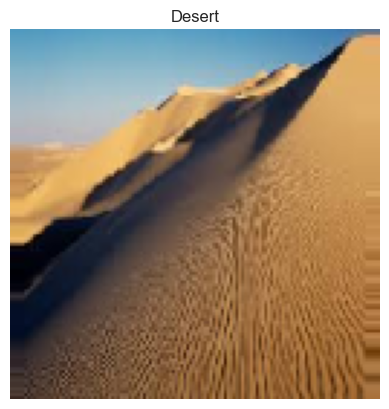

In [61]:
for i in range(5):
    img, label = img_generator.next()
    plt.imshow(img[0])
    plt.title(class_name[tf.argmax(label[0])])
    plt.axis('off')
    plt.show

## Modelling

In [62]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [63]:
model = Sequential()

# Input Layer
model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = [128,128,3]))

# Hidden Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

# Output Layer
model.add(Dense(2, activation = 'softmax'))

### Compile

In [64]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [65]:
hasil = model.fit(train, epochs=10, validation_data = validation)

Epoch 1/10
21/21 [==============================] - 65s 3s/step - loss: 0.4379 - accuracy: 0.8224 - val_loss: 0.0722 - val_accuracy: 0.9750
Epoch 2/10
21/21 [==============================] - 66s 3s/step - loss: 0.0803 - accuracy: 0.9673 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 3/10
21/21 [==============================] - 63s 3s/step - loss: 0.0638 - accuracy: 0.9766 - val_loss: 0.1368 - val_accuracy: 0.9563
Epoch 4/10
21/21 [==============================] - 63s 3s/step - loss: 0.0541 - accuracy: 0.9766 - val_loss: 0.0782 - val_accuracy: 0.9750
Epoch 5/10
21/21 [==============================] - 63s 3s/step - loss: 0.0419 - accuracy: 0.9813 - val_loss: 0.0264 - val_accuracy: 0.9937
Epoch 6/10
21/21 [==============================] - 63s 3s/step - loss: 0.0380 - accuracy: 0.9907 - val_loss: 0.1372 - val_accuracy: 0.9625
Epoch 7/10
21/21 [==============================] - 65s 3s/step - loss: 0.3300 - accuracy: 0.8769 - val_loss: 0.0596 - val_accuracy: 0.9875
Epoch 8/10
21/21 [==

## Evaluasi

In [66]:
evaluasi = model.evaluate(validation)
print(f'Test Loss    : {round(evaluasi[0] * 100,2)} %')
print(f'Test Akurasi : {round(evaluasi[1] * 100,2)} %')


5/5 [==============================] - 4s 712ms/step - loss: 0.0220 - accuracy: 0.9875
Test Loss    : 2.2 %
Test Akurasi : 98.75 %


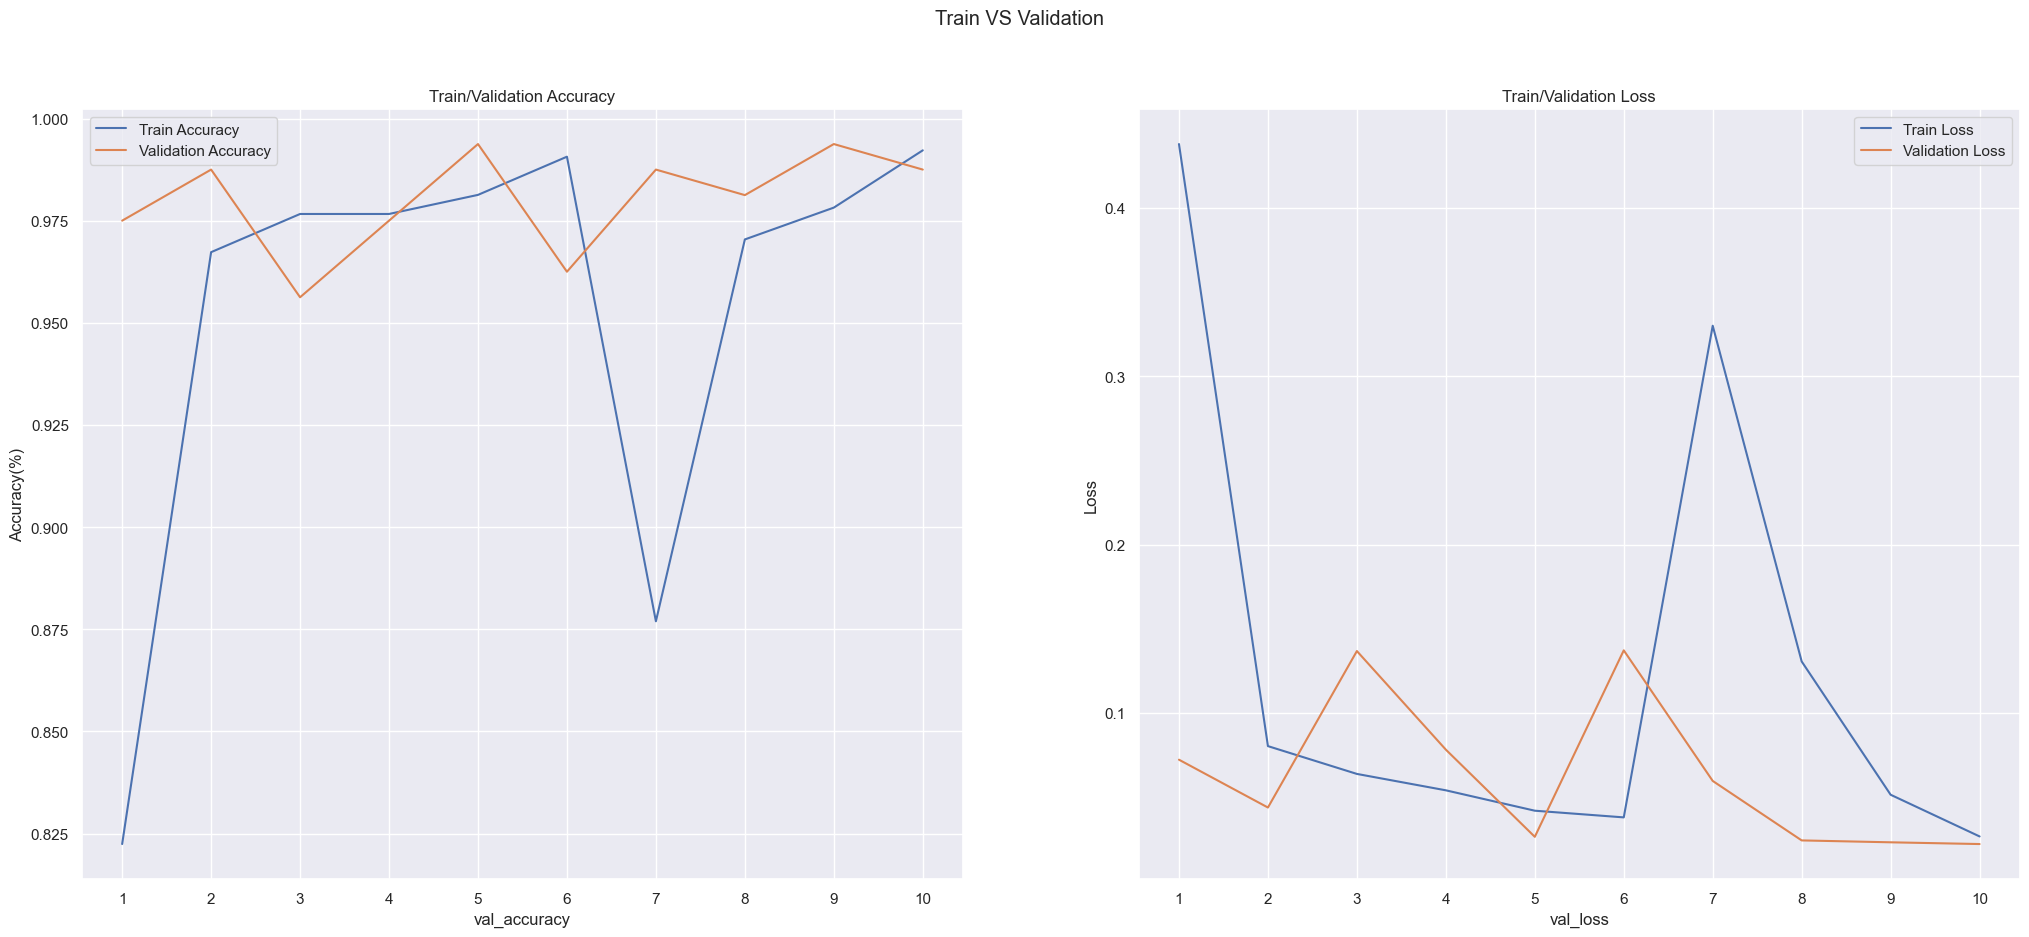

In [67]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('val_accuracy')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('val_loss')
plt.ylabel('Loss')
plt.show()

## Predik

In [68]:
prediction = model.predict(validation)
label_pre = np.argmax(prediction, axis=1)

5/5 [==============================] - 4s 733ms/step


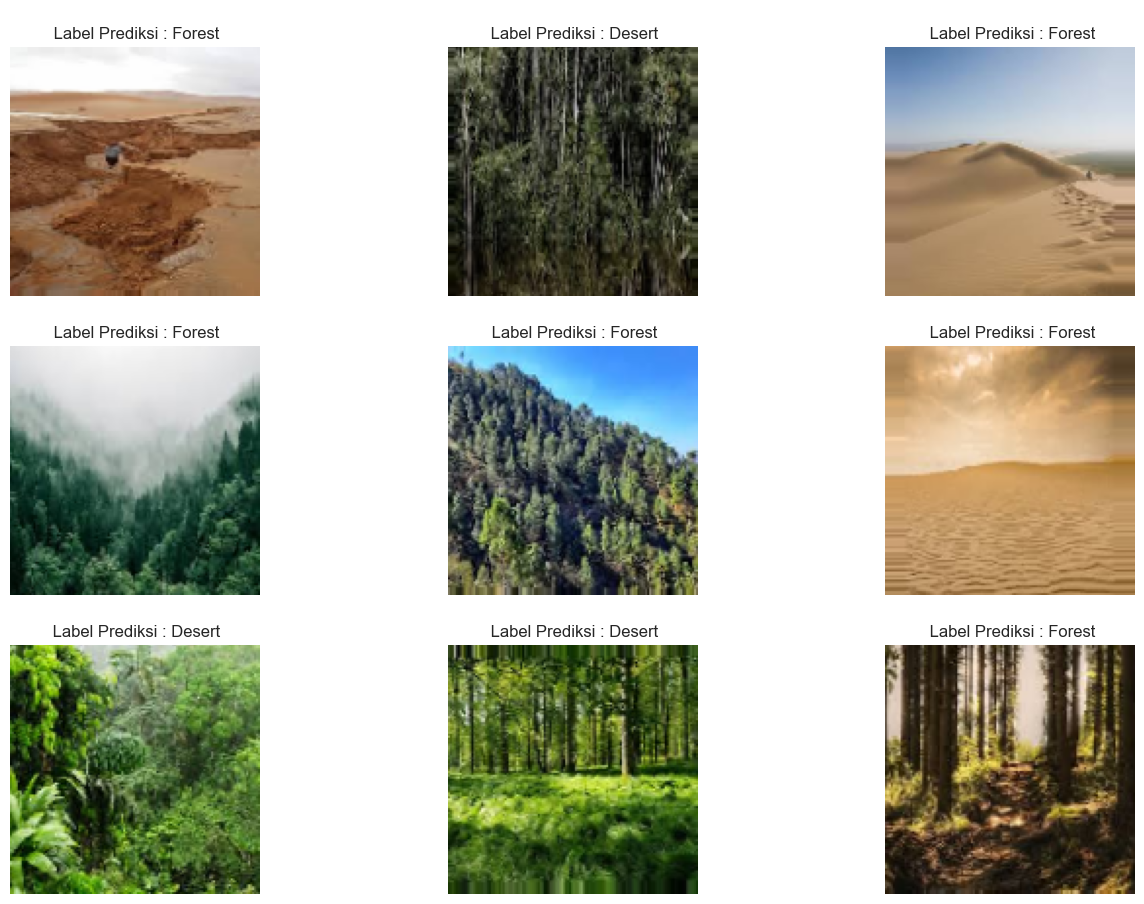

In [69]:
plt.figure(figsize=(16, 11))
for i in range(9):
    img, label = validation.next()
    actual_label = class_name[np.argmax(label[1])]
    plt.subplot(3, 3, i+1)
    plt.title(f"\n Label Prediksi : {class_name[label_pre[i]]}")
    plt.axis('off')
    plt.imshow(img[0])
plt.show()

## Save Model

In [47]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('model/Desert_Forest_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('model/Desert_Forest_weights.h5')